In [3]:
import os
os.getcwd()

'/home/ubuntu/Thesis-KNMI-FoggyGAN/notebooks'

In [4]:
os.chdir('/home/ubuntu/Thesis-KNMI-FoggyGAN')
os.getcwd()

'/home/ubuntu/Thesis-KNMI-FoggyGAN'

In [ ]:
from keras.models import load_model
from tensorflow_addons.layers import InstanceNormalization

cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('models/experiment1/g_model_AtoB_012000.h5', cust)

In [9]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt
from numpy import load
from numpy import expand_dims

def load_image(filename, size=(256,256)):
    # load and resize the image
    pixels = load_img(filename, target_size=size)
    # convert to numpy array
    pixels = img_to_array(pixels)
    # transform in a sample
    pixels = expand_dims(pixels, 0)
    # scale from [0,255] to [-1,1]
    pixels = (pixels - 127.5) / 127.5
    return pixels

In [11]:
import pandas as pd

df = pd.read_pickle('data/raw/allAnnotations20210422_pkv4.pkl')
df

filepath   label  day_phase  \
0      /nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...  No Fog          1   
1      /nas-research.knmi.nl/sensordata/CAMERA/RWS/A1...  No Fog          1   
2      /nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...  No Fog          1   
3      /nas-research.knmi.nl/sensordata/CAMERA/RWS/A4...  No Fog          1   
4      /nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...  No Fog          1   
...                                                  ...     ...        ...   
36354  /nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...  No Fog          1   
36355  /nas-research.knmi.nl/sensordata/CAMERA/RWS/A4...  No Fog         11   
36356  /nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...     Fog          0   
36357  /nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...  No Fog         20   
36358  /nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...     Fog          0   

                                   filename  
0      A50-HM1927-ID11542_20181102_0651.jpg  
1       A15-HM797-ID12045_20181103_0941.jpg  
2      A28-HM1982-ID13517_20181103_0801.jpg  
3       A4-HM643-ID111940_20181103_0831.jpg  
4      A50-HM1838-ID11510_20181103_1011.jpg  
...                                     ...  
36354    A2-HM765-ID10913_20170905_1100.jpg  
36355    A4-HM118-ID13975_20200121_1610.jpg  
36356  A50-HM1907-ID11535_20200121_2300.jpg  
36357  A50-HM1858-ID11642_20170915_0431.jpg  
36358    A2-HM758-ID10911_20200122_0500.jpg  

[42858 rows x 4 columns]

# Sample clear images during dusk, dawn or nighttime

## MEANING OF DAY_PHASE LABELS

- 0;"night"
- 1;"day"
- 10;"civil dawn"
- 11;"civil dusk"
- 20;"nautical dawn"
- 21;"nautical dusk"
- 30;"astronomical dawn"
- 31;"astronomical dusk"

In [27]:
# Sample 20 raondom images without fog and during nighttime, dawn or dusk
filenames = df[(df.label=='No Fog') & (df.day_phase != 1)].sample(20, random_state=2).filename.values

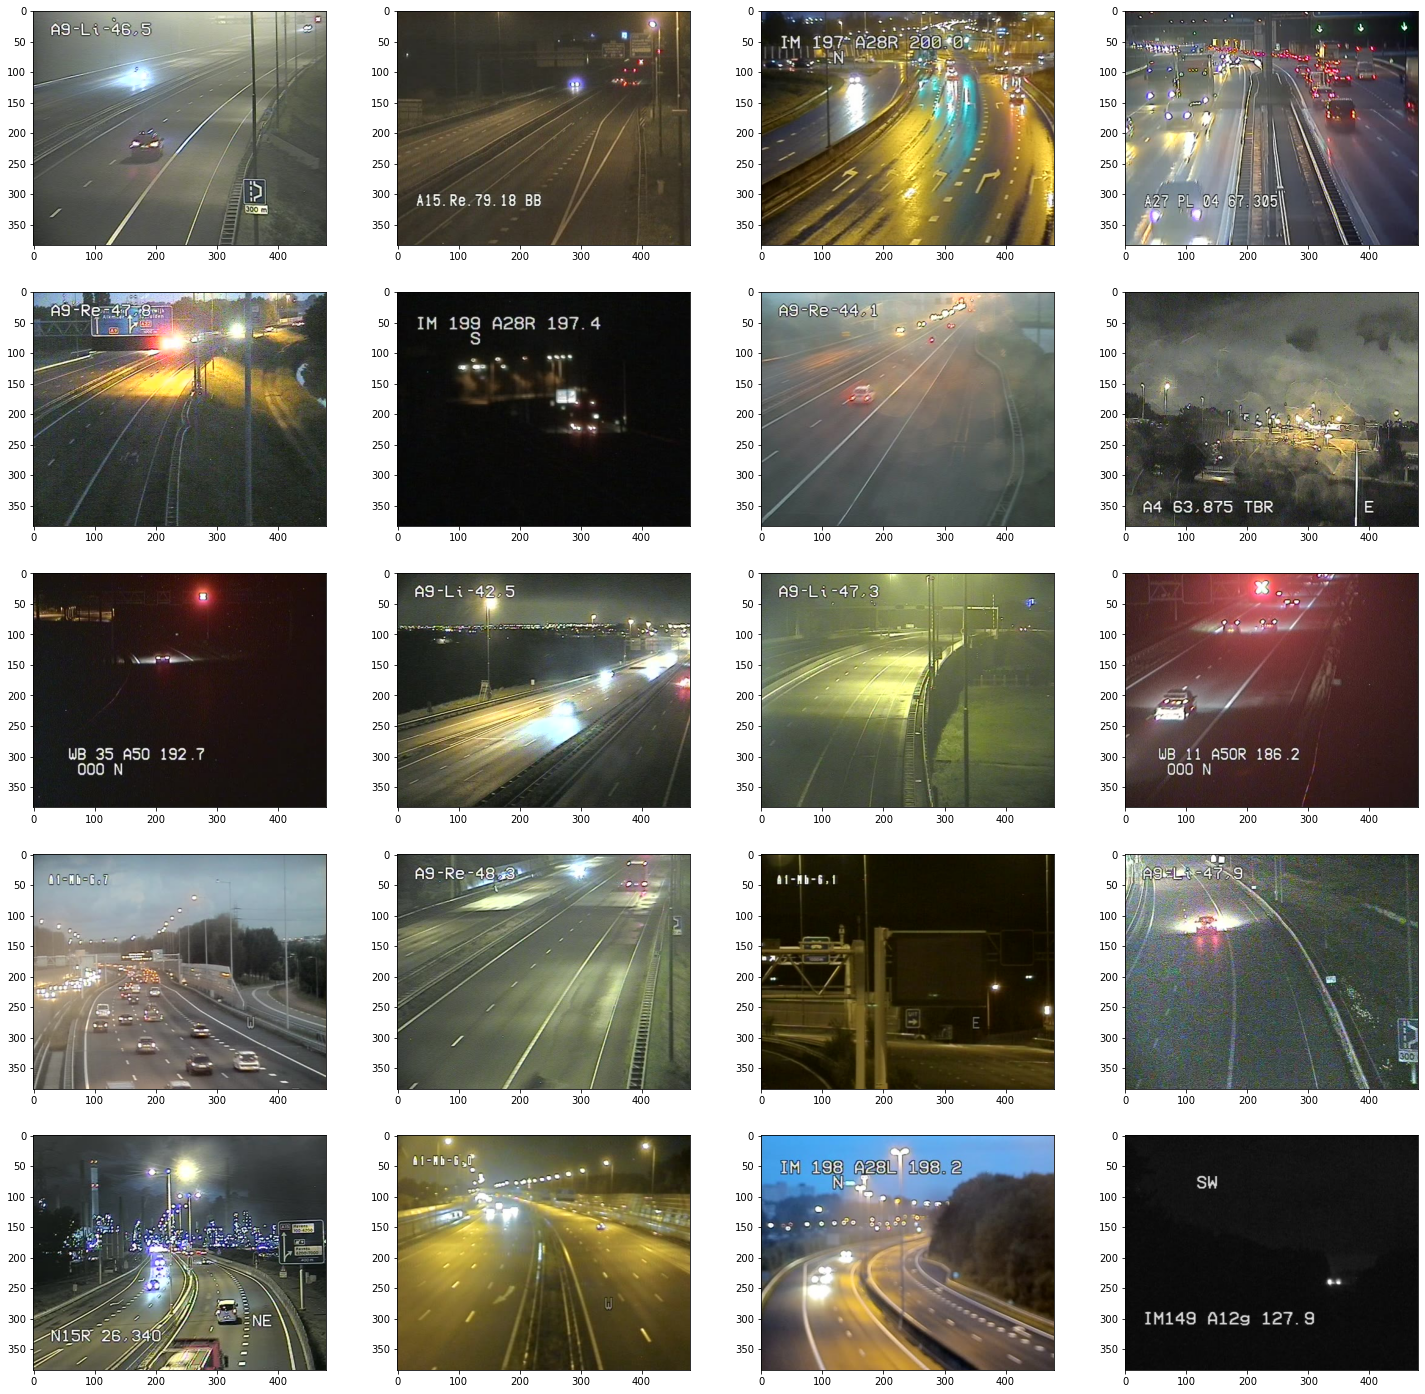

In [36]:
rows = 5
cols = 4
axes=[]

fig = plt.figure(figsize=(25,25))

for i in range(rows*cols):
    path = os.path.join('data/raw/images_data', filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i+1))
    plt.imshow(img)

# Load images

In [37]:
datafolder = 'data/raw/images_data'
images = []

for fname in filenames:
    path = os.path.join(datafolder, fname)
    image = load_image(path)
    images.append(image)

# Translate images

In [40]:
translations = []

for image in images:
    translation = model_AtoB.predict(image)
    translation = (translation+1)/2 # Rescale back from [-1, 1] to [0,1]
    translations.append(translation)

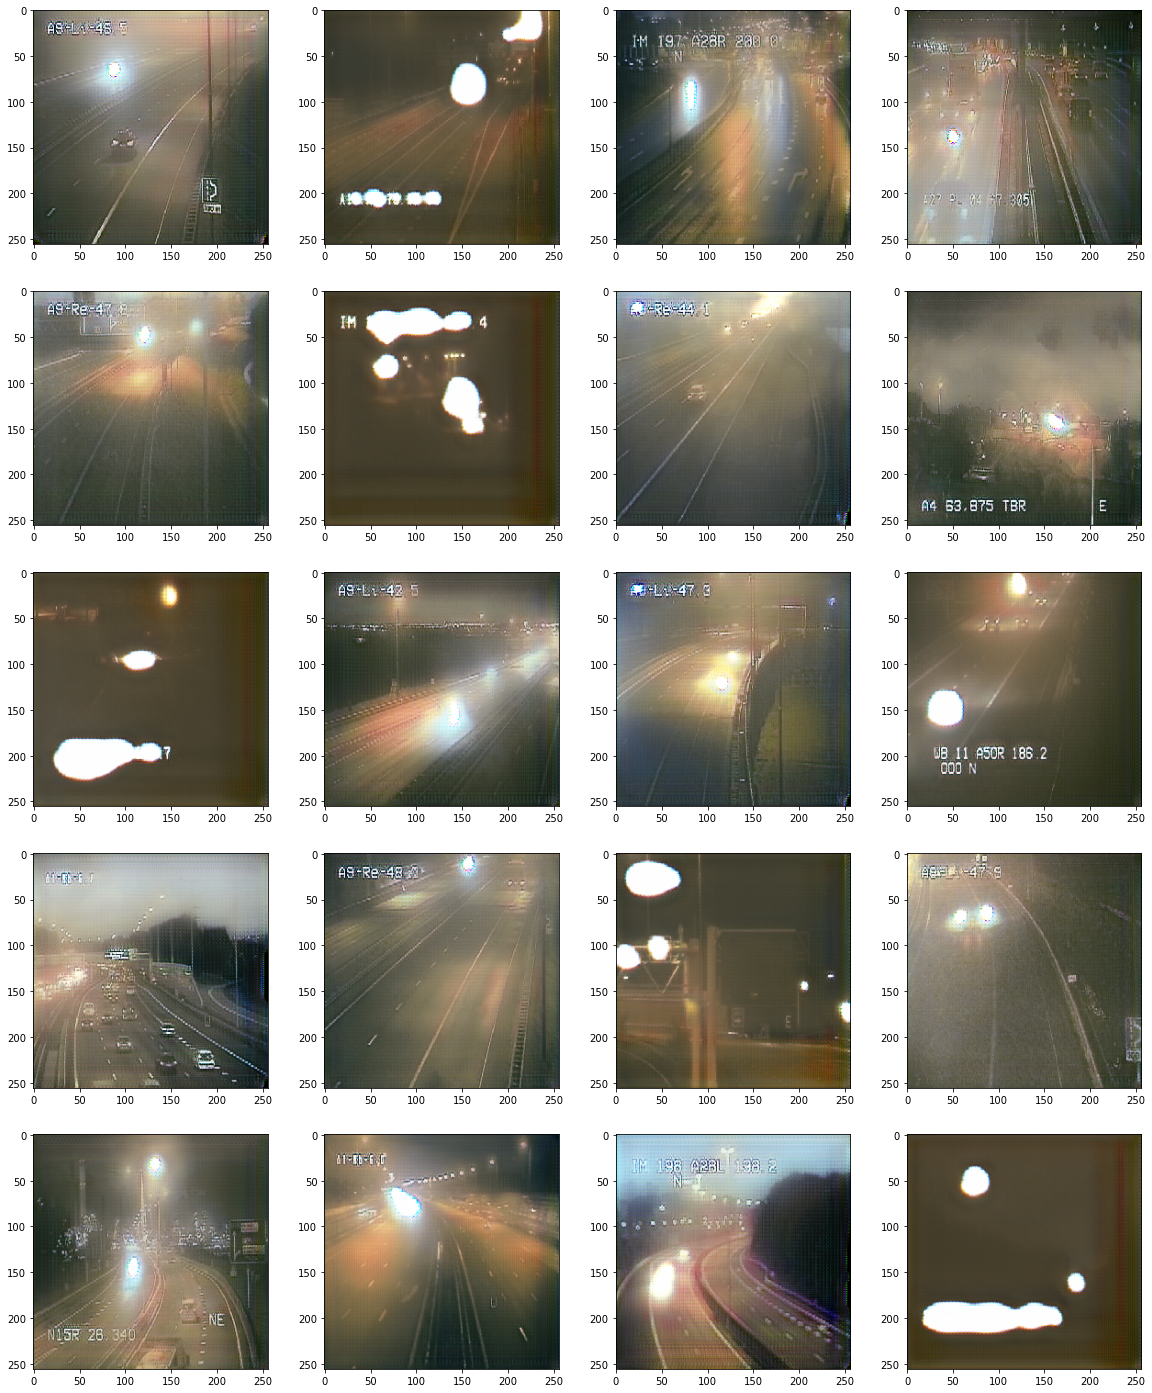

In [43]:
rows = 5
cols = 4
axes=[]

fig = plt.figure(figsize=(20,25))

for i in range(rows*cols):
    axes.append(fig.add_subplot(rows, cols, i+1))
    plt.imshow(translations[i][0])